In [442]:
# x^(1-t) + y^(1-t) = k
# -> y = (k - x^(1-t))^1/(1-t)

def K(x,y,t):
    return pow(x,1-t) + pow(y,1-t)

def Y(x,t,k):
    return pow(k-pow(x,1-t),1/(1-t))

# Marginal Price
def P(x,t,k):
    return pow(pow(k-pow(x,1-t),1/(1-t))/x,t)

# Marginal Interest Rate 
def R(x,t,k):
    return pow(k-pow(x,1-t),1/(1-t))/x - 1


In [478]:
x=1000
y=1000
t = 45/365
k = K(x,y,t)
display(k)
p45=P(x+100,t,k)
p2_45=P2(x+100,t,k)
print("FYT expires in 45 days: " + str(p45))


x=1000
y=1000
t = 30/365
k = K(x,y,t)
display(k)
p30=P(x+100,t,k)
p2_30=P2(x+100,t,k)
print("FYT expires in 30 days: " + str(p30))

x=1000
y=1000
t = 15/365
k = K(x,y,t)
display(k)
p15=P(x+100,t,k)
print("FYT expires in 15 days: " + str(p15))


display(pow((p2_45/p2_30),t))
display(pow((p2_45/p2_30),t)-p15)
display(p45/p30 - p15)

853.4281857037125

FYT expires in 45 days: 0.9757261836525313


1133.5864686422494

FYT expires in 30 days: 0.9837150976800727


1505.7134313289832

FYT expires in 15 days: 0.9918057299675999


0.9996649469892833

0.007859217021683462

7.310360282930528e-05

In [480]:
# swap fyt45 for fyt30
x=1000
y=1000
t = .5
k = K(x,y,t)
display(k)
p45=P(x+1,t,k)
print("FYT expires in .5: " + str(p45))


x=1000
y=1000
t = .25
k = K(x,y,t)
display(k)
p30=P(x+1,t,k)
print("FYT expires in .25: " + str(p30))

x=1000
y=1000
t = .25
k = K(x,y,t)
display(k)
p15=P(x+1,t,k)
print("FYT expires in 15 days: " + str(p15))


display(p45/p30)
display(p45/p30 - p15)

63.245553203367585

FYT expires in 45 days: 0.9990007493755463


355.65588200778456

FYT expires in 30 days: 0.9995001873282469


355.65588200778456

FYT expires in 15 days: 0.9995001873282469


0.9995003122970536

1.2496880674728317e-07

/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


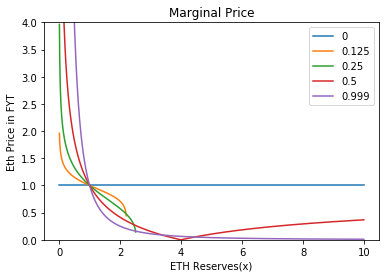

In [424]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(.01, 10,.01)

def y(domain,t): 
    k = K(1,1,t)
    l = []
    for x in domain:
        l.append(P(x,t,k))
    return l

plt.plot(x, y(x,0))
plt.plot(x, y(x,0.125))
plt.plot(x, y(x,0.25))
plt.plot(x, y(x,0.5))
plt.plot(x, y(x,0.999))
plt.ylim(0, 4)
plt.xlabel('ETH Reserves(x)')
plt.ylabel('Eth Price in FYT')
plt.title('Marginal Price')
plt.legend(('0','0.125','0.25','0.5','0.999'))
plt.show()

/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


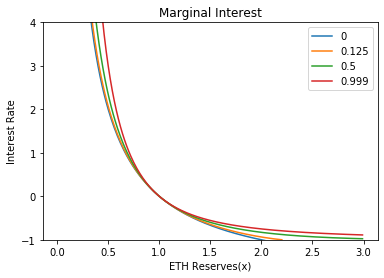

In [425]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(.01, 3,.01)

def y(domain,t): 
    k = K(1,1,t)
    l = []
    for x in domain:
        l.append(R(x,t,k))
    return l

plt.plot(x, y(x,0))
plt.plot(x, y(x,0.125))
plt.plot(x, y(x,0.5))
plt.plot(x, y(x,0.999))
plt.ylim(-1,4)
plt.xlabel('ETH Reserves(x)')
plt.ylabel('Interest Rate')
plt.title('Marginal Interest')
plt.legend(('0','0.125','0.5','0.999'))
plt.show()

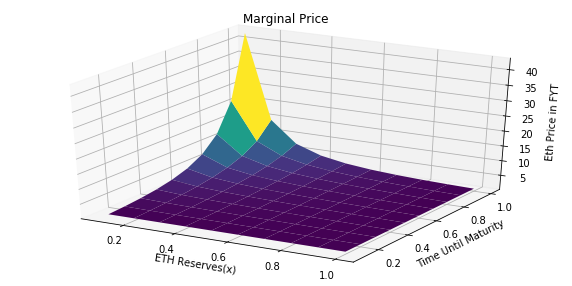

In [426]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = np.arange(.1, 1.1,.1)
t = np.arange(0, 1,.1)
k = np.full((10,10),2)

X, T = np.meshgrid(x, t)
Z = P(X,T,k)

fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.set_zlim(0,10);
ax.set_title('Marginal Price');
ax.set_xlabel('ETH Reserves(x)');
ax.set_ylabel('Time Until Maturity');
ax.set_zlabel('Eth Price in FYT');


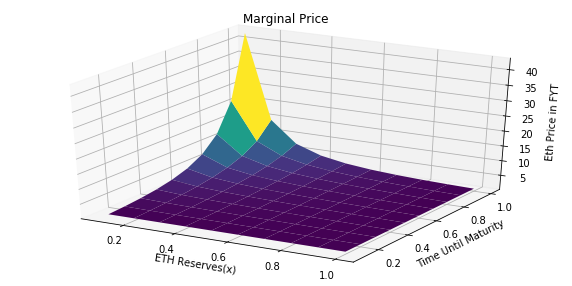

In [440]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = np.arange(.1, 1.1,.1)
t = np.arange(0, 1,.1)
k = np.concatenate([[K(1,1,t)]] * len(x), axis=0)


X, T = np.meshgrid(x, t)
Z = P(X,T,k)
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_title('Marginal Price');
ax.set_xlabel('ETH Reserves(x)');
ax.set_ylabel('Time Until Maturity');
ax.set_zlabel('Eth Price in FYT');